<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Analisis_a_priori_Prueba_de_diferencia_de_varianzas_utilizando_la_prueba_de_Fisher_de_1_cola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplo de código en Python para calcular el tamaño de las dos muestras en una prueba de diferencia de varianzas utilizando la prueba de Fisher de 1 cola.



La prueba de Fisher de 1 cola se utiliza para comparar la varianza de dos poblaciones diferentes. El objetivo es determinar si las varianzas son iguales o si la una de ellas es mayor que la otra.


La hipótesis nula establece que la razón es igual a 1,
$$H_0:  \frac{\sigma^2_{A}}{\sigma^2_{B}} = 1$$

y la hipótesis alternativa establece que el ratio es mayor a 1,

$$H_1:  \frac{\sigma^2_{A}}{\sigma^2_{B}}  > 1$$


El código que presentaré a continuación sirve para realizar un Análisis A priori que permita determinar el tamaño de las muestras antes de ejecutar el experimento.

El código toma como entrada tres valores: 

* el nivel de significancia deseado (*alpha*), 
* la potencia deseada (*power*), y 
* el tamaño del efecto deseado (*effect_size*). 


A continuación, utiliza un ciclo for para iterar a través de diferentes tamaños muestrales hasta que se alcanza la potencia deseada.

En cada iteración del ciclo for, el código calcula el valor crítico de F utilizando el nivel de significancia deseado (por la cola derecha) y el tamaño muestral actual. Luego, utiliza el tamaño del efecto y el valor crítico de F para calcular la potencia de la prueba. Si la potencia de la prueba es mayor o igual a la potencia deseada, se detiene el ciclo for y se devuelve el tamaño muestral necesario para cada grupo.

Por lo tanto espero que este código sea útil para los investigadores que desean planificar un estudio que involucre una prueba de diferencia de varianzas y necesitan determinar el tamaño muestral necesario para alcanzar una potencia específica.

Finalmente para este caso el tamaño del efecto será calculado de acuerdo a la siguiente ratio:

$$Efecto:  \frac{\sigma_{A}}{\sigma_{B}} $$

In [97]:
#Importamos librerias
import numpy as np #
from scipy import stats 
import matplotlib.pyplot as plt

##Análisis a priori

In [99]:
#Analisis A priori - Prueba de 1 cola
#Calculo de tamaño muestral

#Definir parametros
alpha = 0.05
power = 0.8
effect_size = 1.4
ratio_n = 1.0 #muestra 1 será % más grande que la muestra 2

###################################
def sample_size_fisher(alpha, power, effect_size):
    """
    Calcula el tamaño muestral de dos grupos para una prueba de diferencia de varianzas
    utilizando la prueba de Fisher.
    Args:
        alpha (float): Nivel de significancia deseado (0 < alpha < 1).
        power (float): Potencia deseada (0 < power < 1).
        effect_size (float): Tamaño del efecto deseado.
    Returns:
        n1, n2: Tamaño muestral necesario para cada grupo.
    """
    for n in range(2, 1000):
        f_crit = stats.f.ppf(1-alpha, dfn=(n-1)*ratio_n, dfd=n-1, loc=0, scale=1)
        power_value = stats.f.sf(f_crit, (n-1)*ratio_n, dfd=n-1, loc=0, scale=1*effect_size**2)
        if power_value >= power:
            n1 = n * ratio_n
            n2 = n
            break
    return n1, n2

n1, n2 = sample_size_fisher(alpha, power, effect_size)
print("Tamaño muestral necesario para el grupo 1: ", int(np.ceil(n1)))
print("Tamaño muestral necesario para el grupo 2: ", n2)

Tamaño muestral necesario para el grupo 1:  57
Tamaño muestral necesario para el grupo 2:  57


##Analisis post-hoc

Si se quiere commprobar el caso anterior, por medio de un Análisis Post-hoc, he creado el siguiente código para dicho fin:

In [100]:
#Analisis Post-hoc

#completar resultados
effect = 1.4 #ratio de desv. std s1/s2
F = effect**2 #ratio de varianzas σ1^2/σ2^2
alpha= 0.05
n1 = 57
n2 = 57


#Prueba de 1 cola
LS= stats.f.ppf(1-alpha, dfn=n1-1, dfd=n2-1, loc=0, scale=1)
print(f'F-critic:       {LS:4.4f}')

print(f'F-test:         {F:4.4f}')


#Calculo de p-value
pvalue = (stats.f.sf(F, dfn=n1-1, dfd=n2-1, loc=0, scale=1))#1 cola
print(f'p-value:        {pvalue:4.4f}')

#Calculo de poder, beta y efecto
power = stats.f.sf(LS, dfn=n1-1, dfd=n2-1, loc=0, scale=1*F)
print(f'Power:          {power:4.4f}')

beta = stats.f.cdf(LS, dfn=n1-1, dfd=n2-1, loc=0, scale=1*F)
print(f'beta:           {beta:4.4f}')

print(f'efecto (ratio de desv. std s1/s2): {effect:4.4f}')

#d = (σ1^2 - σ2^2) / sqrt((σ1^2 + σ2^2) / 2)
d = (2.25 - 1) / np.sqrt((2.25+1)/2)
print('d: ', d)

F-critic:       1.5579
F-test:         1.9600
p-value:        0.0065
Power:          0.8035
beta:           0.1965
efecto (ratio de desv. std s1/s2): 1.4000
d:  0.9805806756909202


##Gráficas de nivel

Finalmente si se quiere conocer las curvas de nivel para tamaño de muestras:

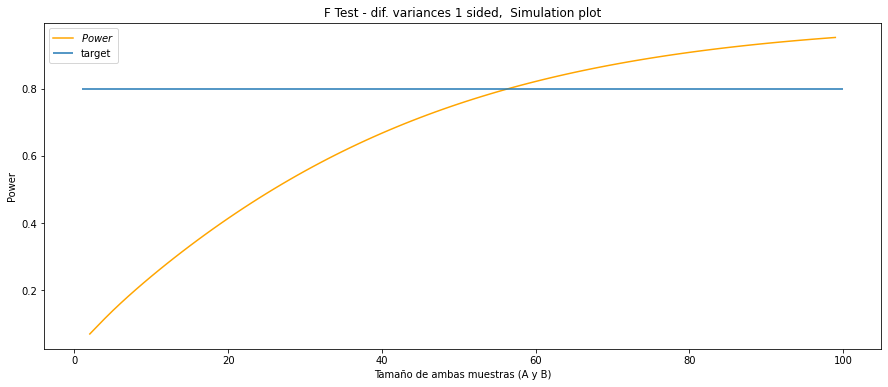

In [125]:
effect = 1.4 #ratio de desv. std s1/s2
F = effect**2 #ratio de varianzas s1Λ2/s2Λ2
alpha= 0.05

x = np.arange(2,100)
FC= stats.f.ppf(1-alpha, dfn=x-1, dfd=x-1, loc=0, scale=1)
power = stats.f.sf(FC, dfn=x-1, dfd=x-1, loc=0, scale=1*F)
#print(power)

plt.figure(figsize=(15, 6)) 
plt.plot(x, power,"orange", label=r'$Power$') #
plt.hlines(y= 0.8 , xmin=1, xmax=100, label=r'target')
plt.ylabel('Power')
plt.xlabel('Tamaño de ambas muestras (A y B)')
plt.title('F Test - dif. variances 1 sided,  Simulation plot')
plt.legend()
plt.show()

##Resumen

El código que he desarrollado permite calcular el tamaño muestral necesario para una prueba de diferencia de varianzas utilizando la prueba de Fisher, a partir de un nivel de significancia, una potencia y un tamaño del efecto deseado. Este código es útil para investigadores que planean estudios que involucren una prueba de diferencia de varianzas y necesitan determinar el tamaño muestral necesario para alcanzar una potencia específica. 

Al utilizar este código, los investigadores pueden planificar estudios más efectivos y rigurosos, lo que aumenta la calidad de la investigación y la confiabilidad de los resultados. En resumen, este código puede ser útil en la planificación y diseño de estudios para una amplia variedad de disciplinas y áreas de investigación.